In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
data = pd.read_csv("quarter_notional_amounts_by_currency.csv")

In [22]:
data.head()

,Frequency,Measure,Risk category,Instrument,Issue currency,Location of trade (Exchange or country),Period,31/03/1993,30/06/1993,30/09/1993,...,31/03/2016,30/06/2016,30/09/2016,31/12/2016,31/03/2017,30/06/2017,30/09/2017,31/12/2017,31/03/2018,30/06/2018
0,Q:Quarterly,A:Outstanding - notional amounts,C:Interest rates contracts,A:All instruments,TRY:New Turkish Lira,8A:All exchanges,Q:A:C:A:TRY:8A,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q:Quarterly,A:Outstanding - notional amounts,B:Foreign exchange contracts,A:All instruments,"EU1:Sum of ECU, Euro and legacy currencies now...",8A:All exchanges,Q:A:B:A:EU1:8A,72710,71418,69523,...,105322,104472,93268,98764,106686,115103,130152,144536,141337,135472
2,Q:Quarterly,A:Outstanding - notional amounts,B:Foreign exchange contracts,A:All instruments,HUF:Forint,8A:All exchanges,Q:A:B:A:HUF:8A,0,0,0,...,950,912,1198,1181,1253,1155,1144,1093,677,1079
3,Q:Quarterly,A:Outstanding - notional amounts,B:Foreign exchange contracts,A:All instruments,NZD:New Zealand Dollar,8A:All exchanges,Q:A:B:A:NZD:8A,0,0,0,...,2422,3543,4226,3668,3072,4739,2711,3405,3636,3722
4,Q:Quarterly,A:Outstanding - notional amounts,C:Interest rates contracts,A:All instruments,NOK:Norwegian Krone,8A:All exchanges,Q:A:C:A:NOK:8A,0,35,116,...,17898,16592,17263,14037,26353,15619,26340,14260,0,8457


In [23]:
# collect notation
notation_lists = []
for column in data.columns[:6]:
    notation_lists.extend(data["{}".format(column)].unique())

#notation_lists

In [24]:
data["index"] = data.Period.apply(lambda x: x.split(":"))

In [25]:
# transform to paired list
notation_lists = list(map(lambda x: x.split(":"), notation_lists))

# create notation dictionary
notation_dict = {}
for notation in notation_lists:
    try:
        notation_dict["{}".format(notation[0])] = notation[1]
    except:
        notation_dict["{}".format(notation[0])] = "unknown"
notation_dict

{'$TO1+TO1-AUD-BRL-CAD-CHF-CNY-DKK-EU1-GBP-HKD-HUF-INR-JPY-KRW-MXN-NOK-NZD-PLN-RUB-SEK-SGD-TRY-TWD-USD-ZAR': 'unknown',
 '$TO1-AUD-BRL-CAD-CHF-CNY-DKK-EU1-GBP-HKD-HUF-INR-JPY-KRW-MXN-NOK-NZD-PLN-RUB-SEK-SGD-TRY-TWD-USD-ZAR': 'unknown',
 '8A': 'All exchanges',
 'A': 'All instruments',
 'AUD': 'Australian Dollar',
 'B': 'Foreign exchange contracts',
 'BRL': 'Brazilian Real',
 'C': 'Interest rates contracts',
 'CAD': 'Canadian Dollar',
 'CHF': 'Swiss Franc',
 'CNY': 'Renminbi',
 'DKK': 'Danish Krone',
 'EU1': 'Sum of ECU, Euro and legacy currencies now included in the Euro',
 'GBP': 'Pound Sterling',
 'HKD': 'Hong Kong Dollar',
 'HUF': 'Forint',
 'INR': 'Indian Rupee',
 'JPY': 'Yen',
 'KRW': 'Won',
 'MXN': 'Mexican Peso',
 'NOK': 'Norwegian Krone',
 'NZD': 'New Zealand Dollar',
 'PLN': 'Zloty',
 'Q': 'Quarterly',
 'RUB': 'Russian rouble',
 'SEK': 'Swedish Krona',
 'SGD': 'Singapore Dollar',
 'TO1': 'Total all currencies',
 'TRY': 'New Turkish Lira',
 'TWD': 'New Taiwan Dollar',
 'USD': 'U

In [31]:
data.columns[7:-1]

Index(['31/03/1993', '30/06/1993', '30/09/1993', '31/12/1993', '31/03/1994',
       '30/06/1994', '30/09/1994', '31/12/1994', '31/03/1995', '30/06/1995',
       ...
       '31/03/2016', '30/06/2016', '30/09/2016', '31/12/2016', '31/03/2017',
       '30/06/2017', '30/09/2017', '31/12/2017', '31/03/2018', '30/06/2018'],
      dtype='object', length=102)

In [48]:
def plot_result(data, keys):
    # plot setting
    plt.figure(figsize = (16, 8))
    plt.style.use('seaborn')
    
    #create time index for x axis
    time_index = list(map(lambda x: datetime.strptime(x, "%d/%m/%Y"), data.columns[7:-1]))
    
    for i in range(len(data)):
        count = []
        collected_keys = []
        temp_data = data.iloc[i, :]
        for key in keys:
            if key in temp_data["index"]:
                count.append(1)
                collected_keys.append(key)
        if sum(count) == 2:
            temp_label = ""
            for collected_key in collected_keys:
                temp_label += " - {}".format(notation_dict[collected_key])
            temp_label = temp_label[2:]
            plt.plot(time_index, temp_data.iloc[7:-1], label = temp_label, marker = ".", ms = 8)
    plt.legend()

In [ ]:
["JPY", "KRW", "AUD", "HKD", "CNY", "SGD"]

# Interest

## 全部

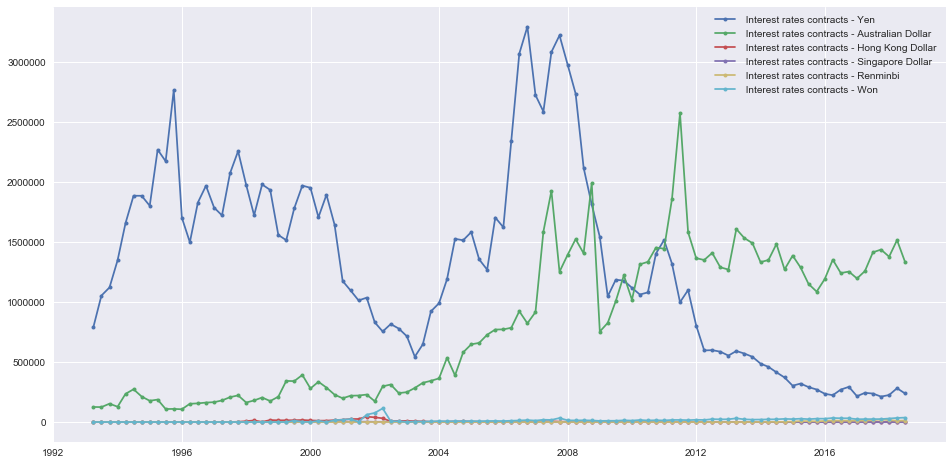

In [49]:
plot_result(data, ["C", "JPY", "KRW", "AUD", "HKD", "CNY", "SGD"])

## 小的

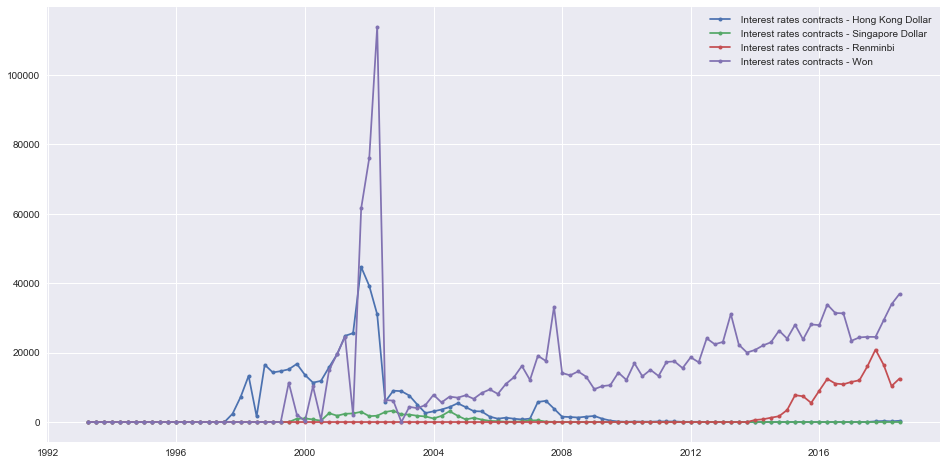

In [50]:
plot_result(data, ["C", "KRW", "HKD", "CNY", "SGD"])

# Foreign exchange

## 全部

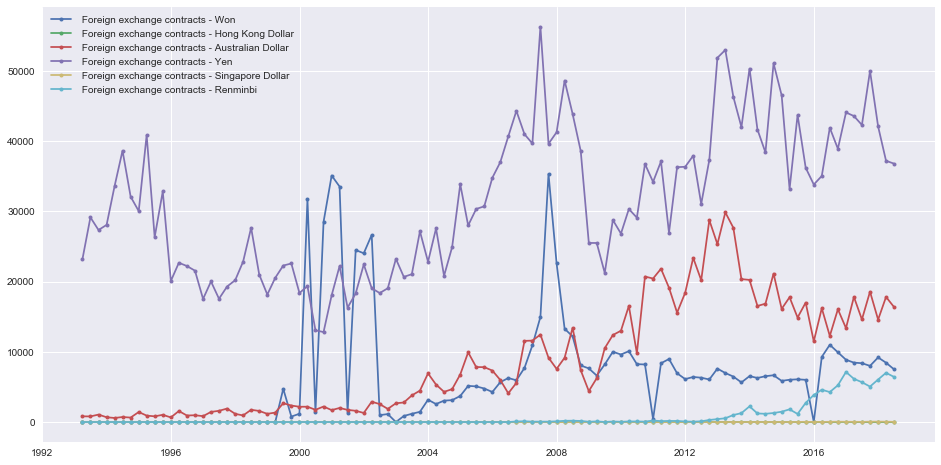

In [51]:
plot_result(data, ["B", "JPY", "KRW", "AUD", "HKD", "CNY", "SGD"])

## 小的

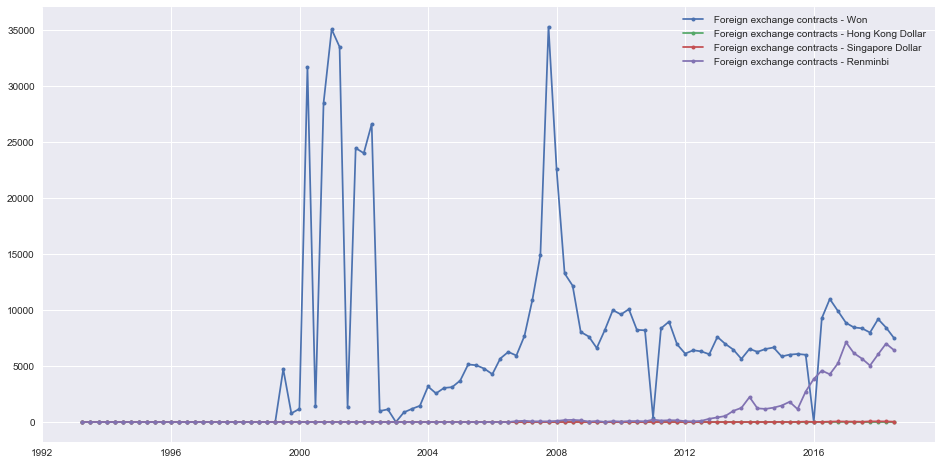

In [54]:
plot_result(data, ["B", "KRW", "HKD", "CNY", "SGD"])